In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-ham-dataset/spamhamdata.csv


AYUSH AGARWAL 

3rd year Electronics Engineering , IIT BHU Varanasi 

Spam Classification NLP Project 

In [110]:
##################################
# reading the dataset 
###########################
messages=pd.read_csv('../input/spam-ham-dataset/spamhamdata.csv',sep='\t',names=["label","message"])
print(messages.head())
print(messages.shape)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)


ham     4825
spam     747
Name: label, dtype: int64


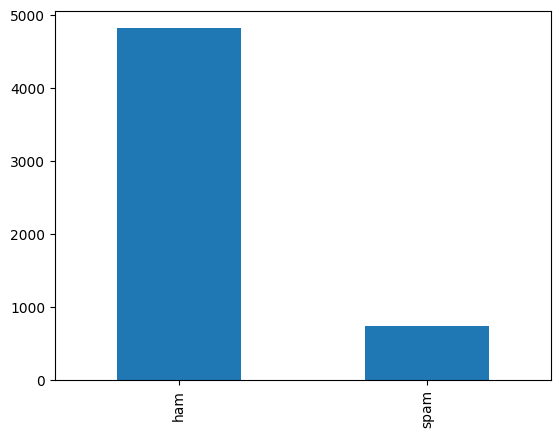

In [111]:
####################################################
# seeing the distribution of the output classes 
#######################################
messages['label'].value_counts().plot(kind='bar')
print(messages['label'].value_counts())

  label                                            message  body_len  \
0   ham  Go until jurong point, crazy.. Available only ...        92   
1   ham                      Ok lar... Joking wif u oni...        24   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128   
3   ham  U dun say so early hor... U c already then say...        39   
4   ham  Nah I don't think he goes to usf, he lives aro...        49   

   body_len_with_space  num_sent  caps  punct%  num%  
0                  111         2     0     9.8   0.0  
1                   29         2     0    25.0   0.0  
2                  155         2     2     4.7  19.5  
3                   49         1     2    15.4   0.0  
4                   61         1     1     4.1   0.0  


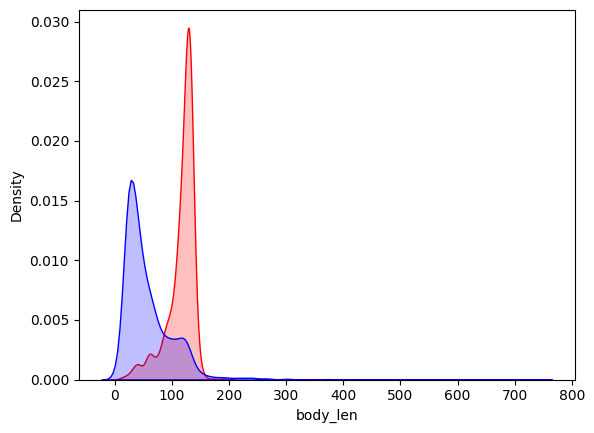

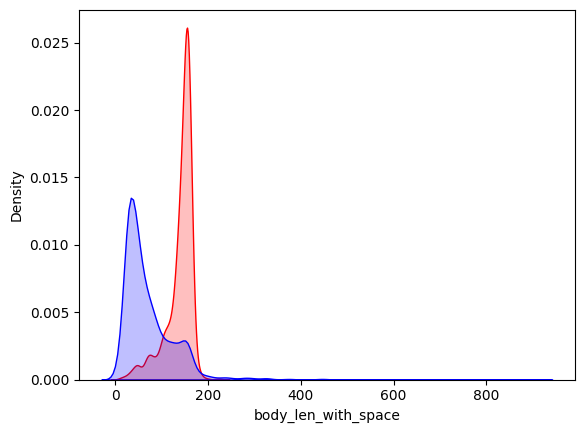

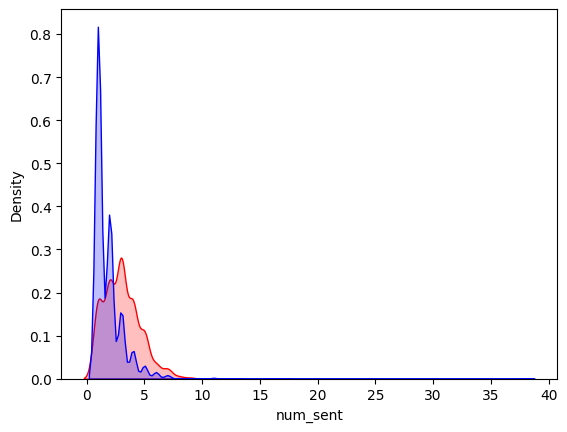

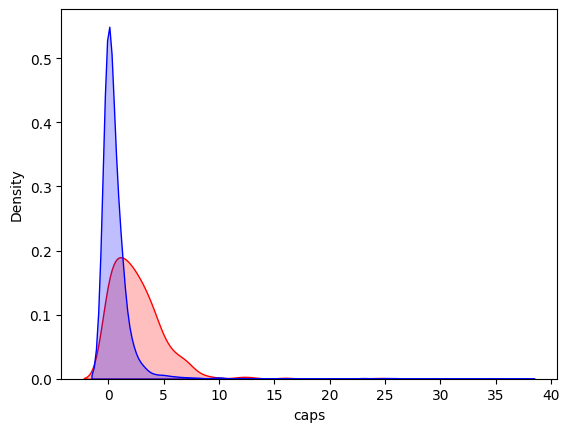

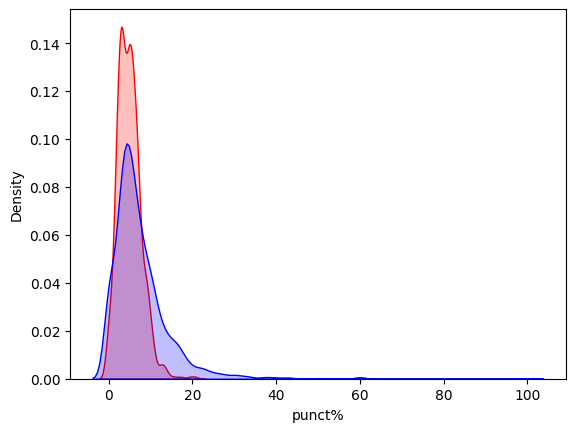

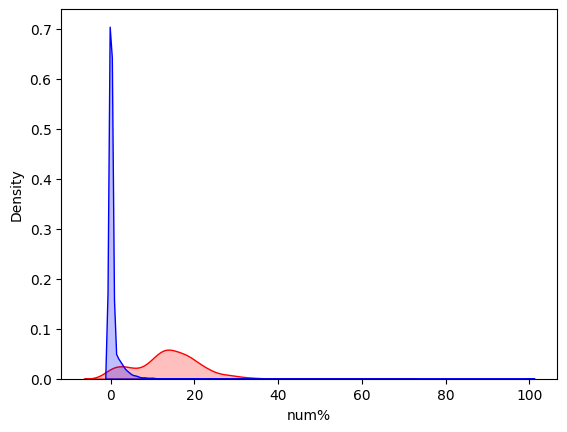

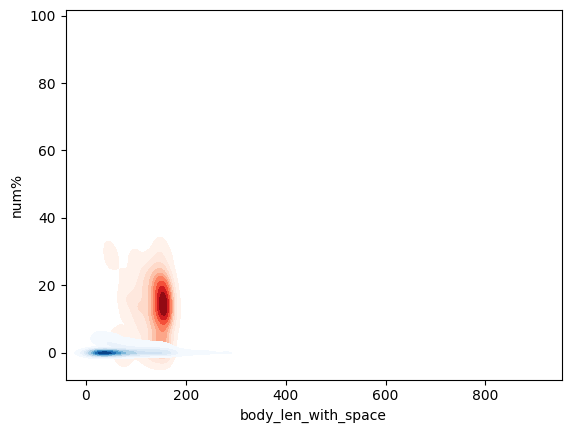

In [112]:
##################################################################################
# FEATURE ENGINEERING
#################################################################
# feature engineering - length of message and % of punctuation used in message
# tons of features I handcoded , some of them are really working well 
import matplotlib.pyplot as plt
import string
import nltk
# Function to calculate length of message excluding space
messages['body_len'] = messages['message'].apply(lambda x: len(x) - x.count(" "))
# Function to calculate length of message including space
messages['body_len_with_space'] = messages['message'].apply(lambda x: len(x))
# number of sentences 
messages['num_sent'] = messages['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
# number of capital letters
messages['caps'] = messages['message'].apply(lambda x: sum(map(str.isupper,x.split())))

# function to calculate percentage of punctuations 
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

messages['punct%'] = messages['message'].apply(lambda x: count_punct(x))
# print(messages.head())

# function to calculate percentage of numbers in a string 
def count_num(text):
    count = sum([1 for char in text if char in string.digits])
    return round(count/(len(text) - text.count(" ")), 3)*100

messages['num%'] = messages['message'].apply(lambda x: count_num(x))
print(messages.head())

# some more features which I didnt feel need to include 
# https://www.analyticsvidhya.com/blog/2021/04/a-guide-to-feature-engineering-in-nlp/
import seaborn as sns
sns.kdeplot(messages.loc[(messages['label']=='spam')]['body_len'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['body_len'], color='b',fill=True)
plt.show()
sns.kdeplot(messages.loc[(messages['label']=='spam')]['body_len_with_space'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['body_len_with_space'], color='b',fill=True)
plt.show()
sns.kdeplot(messages.loc[(messages['label']=='spam')]['num_sent'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['num_sent'], color='b',fill=True)
plt.show()
sns.kdeplot(messages.loc[(messages['label']=='spam')]['caps'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['caps'], color='b',fill=True)
plt.show()
sns.kdeplot(messages.loc[(messages['label']=='spam')]['punct%'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['punct%'], color='b',fill=True)
plt.show()
sns.kdeplot(messages.loc[(messages['label']=='spam')]['num%'], color='r',fill=True)
sns.kdeplot(messages.loc[(messages['label']=='ham')]['num%'], color='b',fill=True)
plt.show()

# this 2D KDE plot was really a sign that my handcoded features were very strong 
# and the data was linear boundary separable , which made sense later when 
# logistic regression performed pretty well on the dataset 
sns.kdeplot(x=messages.loc[(messages['label']=='spam')]['body_len_with_space'],
            y=messages.loc[(messages['label']=='spam')]['num%'],
            color='r', fill=True, 
            cmap="Reds")
  
sns.kdeplot(x=messages.loc[(messages['label']=='ham')]['body_len_with_space'], 
            y=messages.loc[(messages['label']=='ham')]['num%'], color='b',
            fill=True, 
            cmap="Blues")
plt.show()

In [113]:
print(messages.head())

  label                                            message  body_len  \
0   ham  Go until jurong point, crazy.. Available only ...        92   
1   ham                      Ok lar... Joking wif u oni...        24   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128   
3   ham  U dun say so early hor... U c already then say...        39   
4   ham  Nah I don't think he goes to usf, he lives aro...        49   

   body_len_with_space  num_sent  caps  punct%  num%  
0                  111         2     0     9.8   0.0  
1                   29         2     0    25.0   0.0  
2                  155         2     2     4.7  19.5  
3                   49         1     2    15.4   0.0  
4                   61         1     1     4.1   0.0  


In [114]:
# very important bug fix for the nltk wordnet lemmatizer n
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
# nlp = load('en_core_web_sm')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [115]:
#######################################
# lemmatization , tokenization , stop words removal , 
# converting to lower case , removing puctuations 
######################################
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.tokenize import word_tokenize
corpus=[]

def txt_preprocess(text):
    # remove any punctuation
    nopunc = [char for char in text if char not in (string.punctuation) ]
    nopunc = ''.join(nopunc)
    # lemmatize , tokenize , remove stopwords and make it lowercase 
    clean = [lemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(nopunc) if word not in stopwords.words('english')]
    corpus.append([word for word in clean])
    return clean

countvectinput = [] 

def txt_preprocess_2(text):
    clean = ' '.join(text)
    countvectinput.append(clean)
    return clean

messages['clean_message_tokens'] = messages['message'].apply(txt_preprocess)
messages['clean_message'] = messages['clean_message_tokens'].apply(txt_preprocess_2)
corpus = [(str) for sublist in corpus for str in sublist]
print(messages.head())
# print(countvectinput)
# print(corpus)

  label                                            message  body_len  \
0   ham  Go until jurong point, crazy.. Available only ...        92   
1   ham                      Ok lar... Joking wif u oni...        24   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128   
3   ham  U dun say so early hor... U c already then say...        39   
4   ham  Nah I don't think he goes to usf, he lives aro...        49   

   body_len_with_space  num_sent  caps  punct%  num%  \
0                  111         2     0     9.8   0.0   
1                   29         2     0    25.0   0.0   
2                  155         2     2     4.7  19.5   
3                   49         1     2    15.4   0.0   
4                   61         1     1     4.1   0.0   

                                clean_message_tokens  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3     

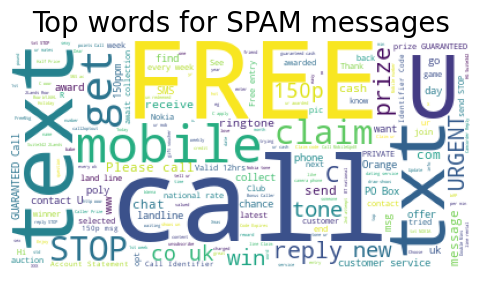

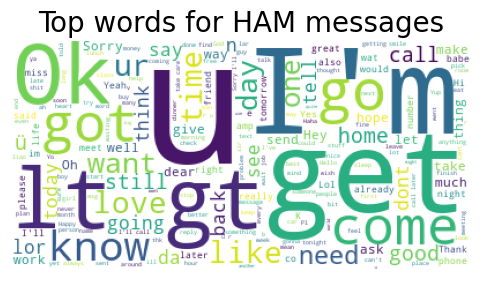

In [116]:
###########################################################
# wordcloud generation 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = ' '.join((messages[messages['label'] == 'spam']['message']).astype(str).tolist())
wc = WordCloud(
    stopwords=stopwords.words('english'),
    background_color='white', 
    max_words=200, 
    contour_width=3, 
    contour_color='firebrick'
)
wc.generate(text)
plt.figure(figsize=(8,3))
plt.title('Top words for SPAM messages',fontsize=20)
plt.imshow(wc)
plt.axis("off")
plt.show()

text = ' '.join((messages[messages['label'] == 'ham']['message']).astype(str).tolist())
wc = WordCloud(
    stopwords=stopwords.words('english'),
    background_color='white', 
    max_words=200, 
    contour_width=3, 
    contour_color='firebrick'
)
wc.generate(text)
plt.figure(figsize=(8,3))
plt.title('Top words for HAM messages',fontsize=20)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [117]:
# print(messages.head())

In [118]:
######################################################
# Count Vectorization - this code took too long to debug 
################################################
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(messages['clean_message'])
# vector = vectorizer.fit_transform(countvectinput)

print(vector.toarray())
# other options - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html#sklearn.preprocessing.MultiLabelBinarizer
# https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
print(vector.toarray().shape)
# df_vectors = pd.DataFrame(vector)
# print(df_vectors.shape)
import numpy
colas = numpy.arange(1, vector.toarray().shape[1]+1)
df_vectors = pd.DataFrame(vector.toarray(),columns=colas)
print(df_vectors.head())

df_vectors.reset_index(drop=True, inplace=True)
messages.reset_index(drop=True, inplace=True)

# messages = messages.append(df_vectors,ignore_index=True)
messages = pd.concat([messages, df_vectors], axis=1)
print(messages.head())
# messages.append(pd.DataFrame(vector.toarray(),columns=colas)) #messages.columns

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5572, 8979)
   1     2     3     4     5     6     7     8     9     10    ...  8970  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...     0   

   8971  8972  8973  8974  8975  8976  8977  8978  8979  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 8979 columns]
  label                              

In [119]:
###############################
# Little bit cleaning the columns
print(messages.columns)
messages.drop(['message','clean_message_tokens','clean_message'], axis = 1, inplace = True)
messages['label'] = messages['label'].replace({'ham': 0, 'spam': 1})
print(messages.head())

Index([               'label',              'message',             'body_len',
        'body_len_with_space',             'num_sent',                 'caps',
                     'punct%',                 'num%', 'clean_message_tokens',
              'clean_message',
       ...
                         8970,                   8971,                   8972,
                         8973,                   8974,                   8975,
                         8976,                   8977,                   8978,
                         8979],
      dtype='object', length=8989)
   label  body_len  body_len_with_space  num_sent  caps  punct%  num%  1  2  \
0      0        92                  111         2     0     9.8   0.0  0  0   
1      0        24                   29         2     0    25.0   0.0  0  0   
2      1       128                  155         2     2     4.7  19.5  0  0   
3      0        39                   49         1     2    15.4   0.0  0  0   
4      0        49    

In [120]:
########################################################
# Test train split 
#####################################
from sklearn.model_selection import train_test_split
y_final = messages['label']
X_final = pd.DataFrame(messages.drop(['label'],axis=1))

X_final.columns = X_final.columns.astype(str)

print(type(y_final))
print(type(X_final))

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.20, random_state = 0)


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


0.979372197309417
0.9236453201970444
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.92      0.94      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



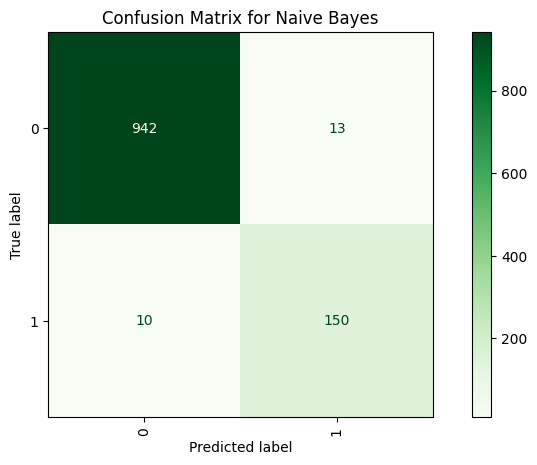

In [121]:
######################################################
# Training model using Naive bayes classifier
##################################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,fbeta_score,classification_report
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(fbeta_score(y_test,y_pred,beta =0.5))
print (classification_report(y_test,y_pred))

import pickle
saved_model=pickle.dumps(spam_detect_model)
import joblib
joblib.dump(spam_detect_model,'naive_bayes_spam_classifier.pkl')

#display the confusion matrix
fig1,ax1 = plt.subplots(figsize = (10,5))
ax1.set_title("Confusion Matrix for Naive Bayes")
lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_display = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,display_labels = lr.classes_)
lr_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.95      0.97       160

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

0.9901345291479821


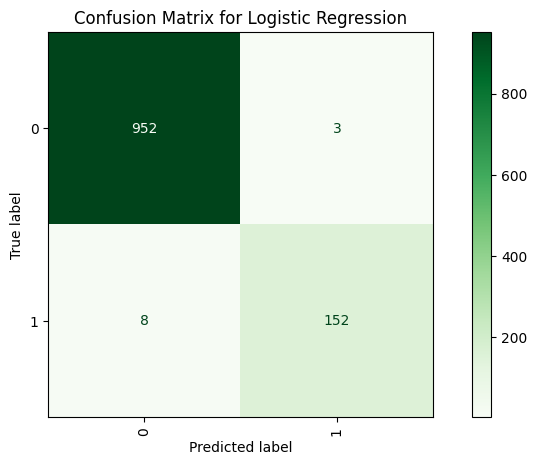

In [122]:
#########################################################
# Training logistic regression model over the data 
######################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#instantiate a Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
#calculate the accuracy score and AUC for this model
lr_score = accuracy_score(y_test, lr_pred)
print (classification_report(y_test,lr_pred))
print(lr_score)
# acc_score.append(lr_score)

import pickle
saved_model=pickle.dumps(lr)
import joblib
joblib.dump(spam_detect_model,'logistic_regression_spam_classifier.pkl')

#display the confusion matrix
fig1,ax1 = plt.subplots(figsize = (10,5))
ax1.set_title("Confusion Matrix for Logistic Regression")
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
lr_display = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,display_labels = lr.classes_)
lr_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

AYUSH AGARWAL 
3rd year Electronics Engineering , IIT BHU Varanasi 
Spam Classification NLP pet Project 